In [2]:
import pandas as pd

In [3]:
train_df = pd.read_csv("dataset/train.csv")
print("Train Dataset:")
print(train_df.head())


#check suraj


Train Dataset:
       ID Customer_ID     Month           Name   Age          SSN Occupation  \
0  0x1602   CUS_0xd40   January  Aaron Maashoh    23  821-00-0265  Scientist   
1  0x1603   CUS_0xd40  February  Aaron Maashoh    23  821-00-0265  Scientist   
2  0x1604   CUS_0xd40     March  Aaron Maashoh  -500  821-00-0265  Scientist   
3  0x1605   CUS_0xd40     April  Aaron Maashoh    23  821-00-0265  Scientist   
4  0x1606   CUS_0xd40       May  Aaron Maashoh    23  821-00-0265  Scientist   

  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  Credit_Mix  \
0      19114.12            1824.843333                  3  ...           _   
1      19114.12                    NaN                  3  ...        Good   
2      19114.12                    NaN                  3  ...        Good   
3      19114.12                    NaN                  3  ...        Good   
4      19114.12            1824.843333                  3  ...        Good   

   Outstanding_Debt Credit_Utilizat

C:\Users\Suraj\AppData\Local\Temp\ipykernel_3568\3951081823.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv("dataset/train.csv")


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [5]:
train_df = train_df.drop(["ID", "Name", "SSN", "Customer_ID","Month"], axis=1)

In [6]:
train_df.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


Data Preprocessing

In [7]:
train_df.isnull().sum()

Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [8]:
column_description = train_df["Monthly_Balance"].describe()
print(column_description)

count                                98800
unique                               98792
top       __-333333333333333333333333333__
freq                                     9
Name: Monthly_Balance, dtype: object


In [9]:
import numpy as np

# Step 1: Convert 'Monthly_Balance' to numeric, forcing errors to NaN
train_df["Monthly_Balance"] = pd.to_numeric(
    train_df["Monthly_Balance"], errors="coerce"
)

# Step 2: Handle NaN values (e.g., fill NaN with the mean of the column)
# You can also use df['Monthly_Balance'].fillna(df['Monthly_Balance'].median(), inplace=True)
train_df["Monthly_Balance"].fillna(train_df["Monthly_Balance"].mean(), inplace=True)

# Verify that the 'Monthly_Balance' column is cleaned
print(train_df["Monthly_Balance"].describe())

count    100000.000000
mean        402.551258
std         212.628374
min           0.007760
25%         270.913865
50%         338.672152
75%         467.670597
max        1602.040519
Name: Monthly_Balance, dtype: float64


In [10]:
#CLEANING THE DATA
# is null 
# invalid values - using min max 
# 

In [11]:
# replace "____" in occupation column to "Other"
train_df["Occupation"].replace("_______", "Other", inplace=True)
# train_df["Occupation"] = train_df["Occupation"].replace("Other")

train_df["Occupation"].value_counts()

Occupation
Other            7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: count, dtype: int64

In [12]:
train_df['Num_of_Loan'] = train_df['Num_of_Loan'].apply(lambda x: str(str(x).replace("_","")))
train_df['Num_of_Loan'] = train_df['Num_of_Loan'].apply(lambda x: abs(float(x)))

In [13]:
# filling not specified instead of na
train_df['Type_of_Loan'] = train_df['Type_of_Loan'].fillna('Not Specified')
# Step 1: Remove duplicates and 'Not Specified'
def clean_loan_types(loan_list):
    # Split the entry by commas, remove duplicates, and strip leading/trailing spaces
    unique_loans = list(set([loan.strip() for loan in loan_list.split(',')]))
    
    # Step 2: Remove 'Not Specified' if there are other loan types
    if 'Not Specified' in unique_loans and len(unique_loans) > 1:
        unique_loans.remove('Not Specified')
    
    # Join the unique loans back into a string
    return ', '.join(unique_loans)

# Apply the function to clean the 'Type_of_Loan' column
train_df['Type_of_Loan'] = train_df['Type_of_Loan'].apply(clean_loan_types)
print(train_df["Type_of_Loan"].describe())


count            100000
unique             2803
top       Not Specified
freq              11408
Name: Type_of_Loan, dtype: object


In [14]:
# Delay_from_due_date should not be negative
train_df['Delay_from_due_date'] = train_df['Delay_from_due_date'].apply(lambda x: abs(x))

In [15]:
# Step 1: Fill missing values with "0"
train_df['Num_of_Delayed_Payment'] = train_df['Num_of_Delayed_Payment'].fillna("0")

# Step 2: Remove underscores
train_df['Num_of_Delayed_Payment'] = train_df['Num_of_Delayed_Payment'].apply(lambda x: str(x).replace("_", ""))

# Step 3: Convert to numeric and handle non-numeric values
train_df['Num_of_Delayed_Payment'] = pd.to_numeric(train_df['Num_of_Delayed_Payment'], errors='coerce')

# Step 4: Fill missing values with 0
train_df['Num_of_Delayed_Payment'] = train_df['Num_of_Delayed_Payment'].fillna(0)

# Step 5: Cap outliers at 99th percentile
upper_limit = train_df['Num_of_Delayed_Payment'].quantile(0.99)
train_df['Num_of_Delayed_Payment'] = train_df['Num_of_Delayed_Payment'].clip(upper=upper_limit)

# Step 6: Convert to integer type
train_df['Num_of_Delayed_Payment'] = train_df['Num_of_Delayed_Payment'].astype(int)


In [16]:
# Step 1: Replace underscores with "0"
train_df['Changed_Credit_Limit'] = train_df['Changed_Credit_Limit'].apply(lambda x: str(x).replace("_", "0"))

# Step 2: Convert to numeric, handling non-numeric values safely
train_df['Changed_Credit_Limit'] = pd.to_numeric(train_df['Changed_Credit_Limit'], errors='coerce')

# Step 3: Handle missing values (e.g., replace NaNs with median or 0)
train_df['Changed_Credit_Limit'] = train_df['Changed_Credit_Limit'].fillna(train_df['Changed_Credit_Limit'].median())


# Step 4: Cap outliers at the 99th percentile to limit extreme values
upper_limit = train_df['Changed_Credit_Limit'].quantile(0.99)
train_df['Changed_Credit_Limit'] = train_df['Changed_Credit_Limit'].clip(upper=upper_limit)


AttributeError: Can only use .str accessor with string values!

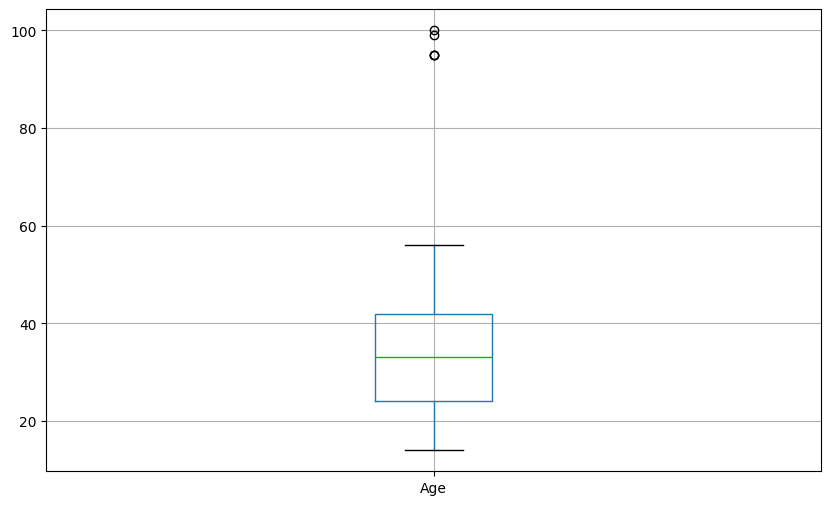

In [18]:
# box plot for age

import matplotlib.pyplot as plt

# plt.figure(figsize=(10, 6))
# train_df.boxplot(column=["Age"])
# plt.show()

train_df['Age'] = pd.to_numeric(train_df['Age'], errors='coerce')

# drop entries with invalid age values greater than 100 and less than 0
train_df = train_df[(train_df['Age'] >= 0) & (train_df['Age'] <= 100)]

# box plot for age
plt.figure(figsize=(10, 6))
train_df.boxplot(column=["Age"])

# for entries in form int_ we will convert them to int for ex 100_ to 100
train_df["Age"] = train_df["Age"].str.replace("_", "").astype(int)


In [19]:
# Credit history age in months
#Dropped all credit History _Age..!!
df = train_df[train_df['Credit_History_Age'].notna()]
df['Credit_History_Age'] = df.Credit_History_Age.apply(lambda x: (int(x.split(' ')[0])*12+int(x.split(' ')[3]))).astype(float)
df['Credit_History_Age'].isnull().sum()

C:\Users\Suraj\AppData\Local\Temp\ipykernel_3568\1840527430.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Credit_History_Age'] = df.Credit_History_Age.apply(lambda x: (int(x.split(' ')[0])*12+int(x.split(' ')[3]))).astype(float)


0

In [20]:
# describe the 'Outstanding_Debt' column
column_description = train_df["Outstanding_Debt"].describe()
print(column_description)

count      92370
unique     13104
top       1151.7
freq          21
Name: Outstanding_Debt, dtype: object


In [21]:
# cleaning credit mix with entries "_" or "" to "Other"
train_df["Credit_Mix"].replace("_", "Other", inplace=True)
train_df["Credit_Mix"].replace("", "Other", inplace=True)

# describe the 'Credit_Mix' column
column_description = train_df["Credit_Mix"].describe()
print(column_description)

count        92370
unique           4
top       Standard
freq         33771
Name: Credit_Mix, dtype: object


In [22]:
# Convert 'Num_Credit_Inquiries' to numeric, forcing errors to NaN
train_df["Num_Credit_Inquiries"] = pd.to_numeric(
    train_df["Num_Credit_Inquiries"], errors="coerce"
)


# Handle NaN values (e.g., fill NaN with the 0)
train_df["Num_Credit_Inquiries"].fillna(
    0, inplace=True
)

# Verify that the 'Num_Credit_Inquiries' column is cleaned
print(train_df["Num_Credit_Inquiries"].describe())

count    92370.000000
mean        27.315990
std        191.709451
min          0.000000
25%          3.000000
50%          5.000000
75%          9.000000
max       2597.000000
Name: Num_Credit_Inquiries, dtype: float64
